In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

In [3]:
csv = pd.read_csv('updated.csv')
df = pd.DataFrame(csv)
df.head()

,Unnamed: 0,date,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,0,1743-11-01,42.9224,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,5,1744-04-01,42.4184,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
2,6,1744-05-01,51.1592,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
3,7,1744-06-01,57.2918,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
4,8,1744-07-01,60.9476,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744


In [4]:
year_mask = df.year > 1800
yearavg = df[year_mask].groupby(['Country', 'year'],as_index=False)['AverageTemperatureF'].mean()

#yearavg.add_columns(['Latitude]['Longitude])

export = yearavg.to_csv('yearlytempavg1800.csv')

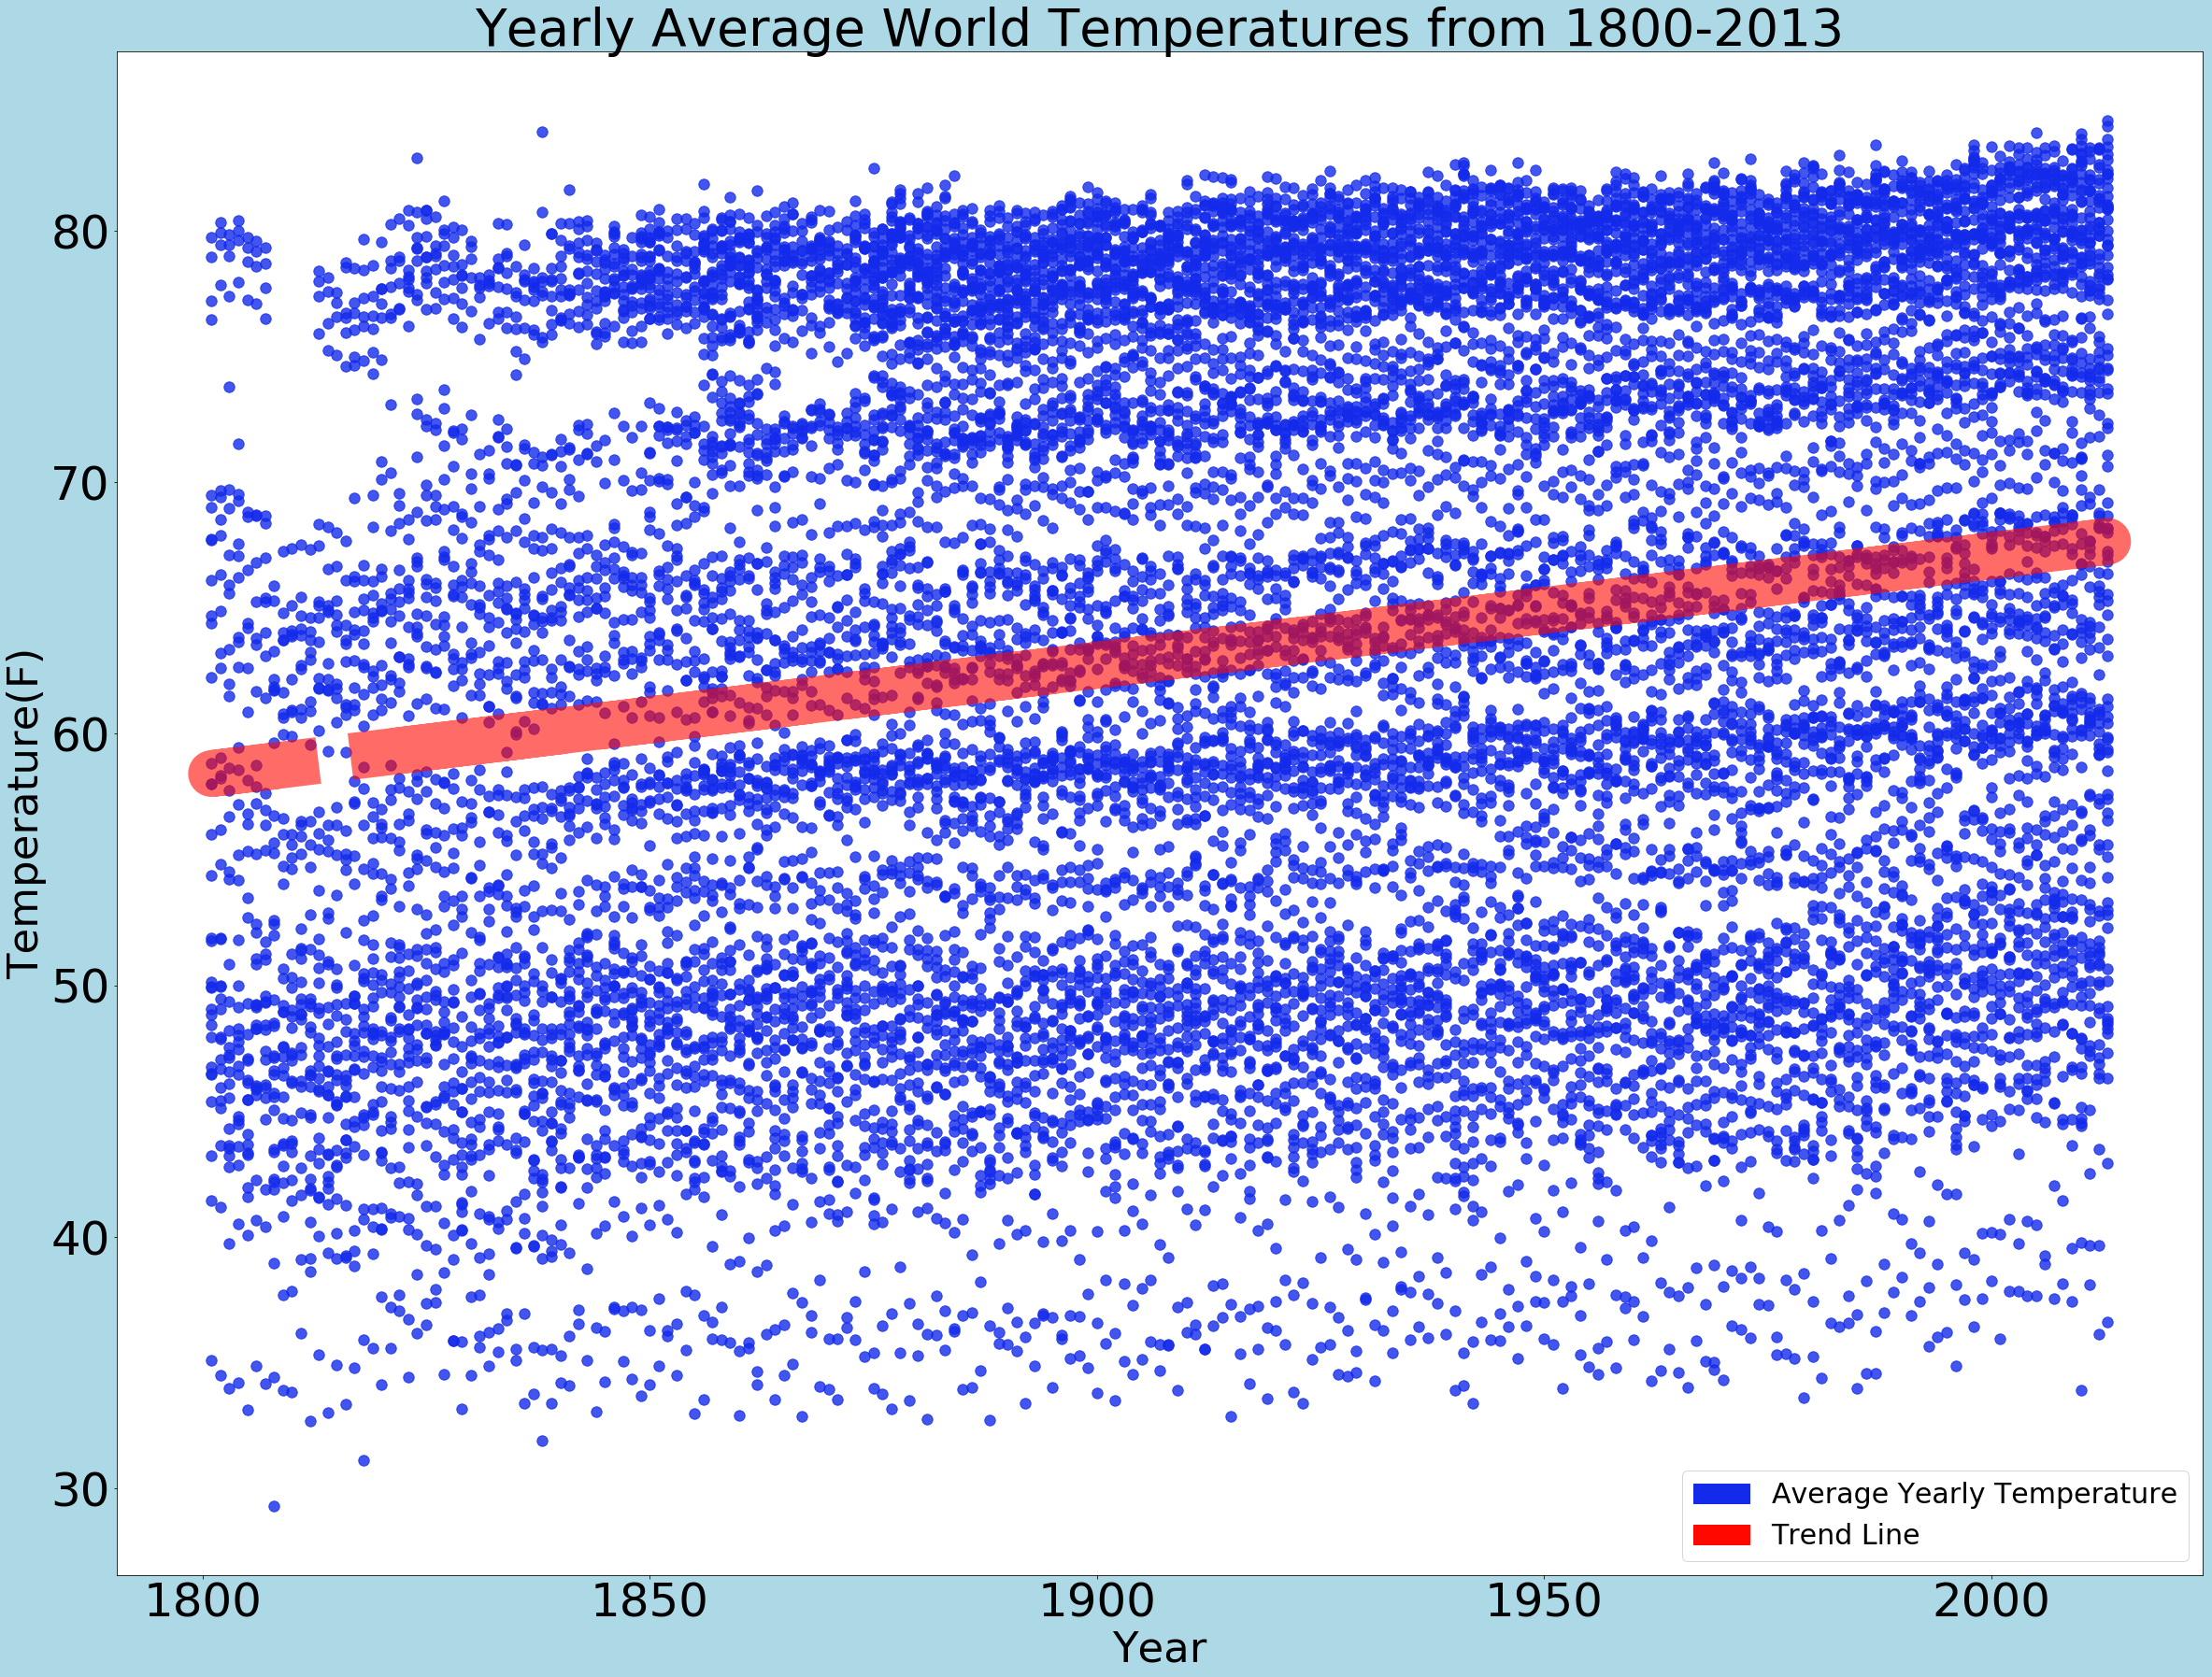

In [5]:
plt.figure(num=None, figsize=(40,30),facecolor='lightblue',edgecolor='black')

plt.xticks(size=50)

plt.xlabel('Year', size=45)

plt.ylabel('Temperature(F)', size=45)

plt.yticks(size=50)

plt.scatter(yearavg['year'], yearavg['AverageTemperatureF'], color='#132AEB', s=130, alpha=.8)

#trend_line

z = np.polyfit(yearavg['year'], yearavg['AverageTemperatureF'], 1)

p = np.poly1d(z)

plt.plot(yearavg['year'],p(yearavg['year']),"r--",color='#FF0800',linewidth=50,alpha=.6)

#legend

blue_patch = mpatches.Patch(color='#132AEB', label='Average Yearly Temperature')

red_patch = mpatches.Patch(color='#FF0800', label='Trend Line')

plt.legend(handles=[blue_patch,red_patch], prop={'size': 30})

red_patch = mpatches.Patch(color='#FF0800', label='Trend Line')

plt.title('Yearly Average World Temperatures from 1800-2013', size=55)

plt.show()

plt.savefig('allddata.png')


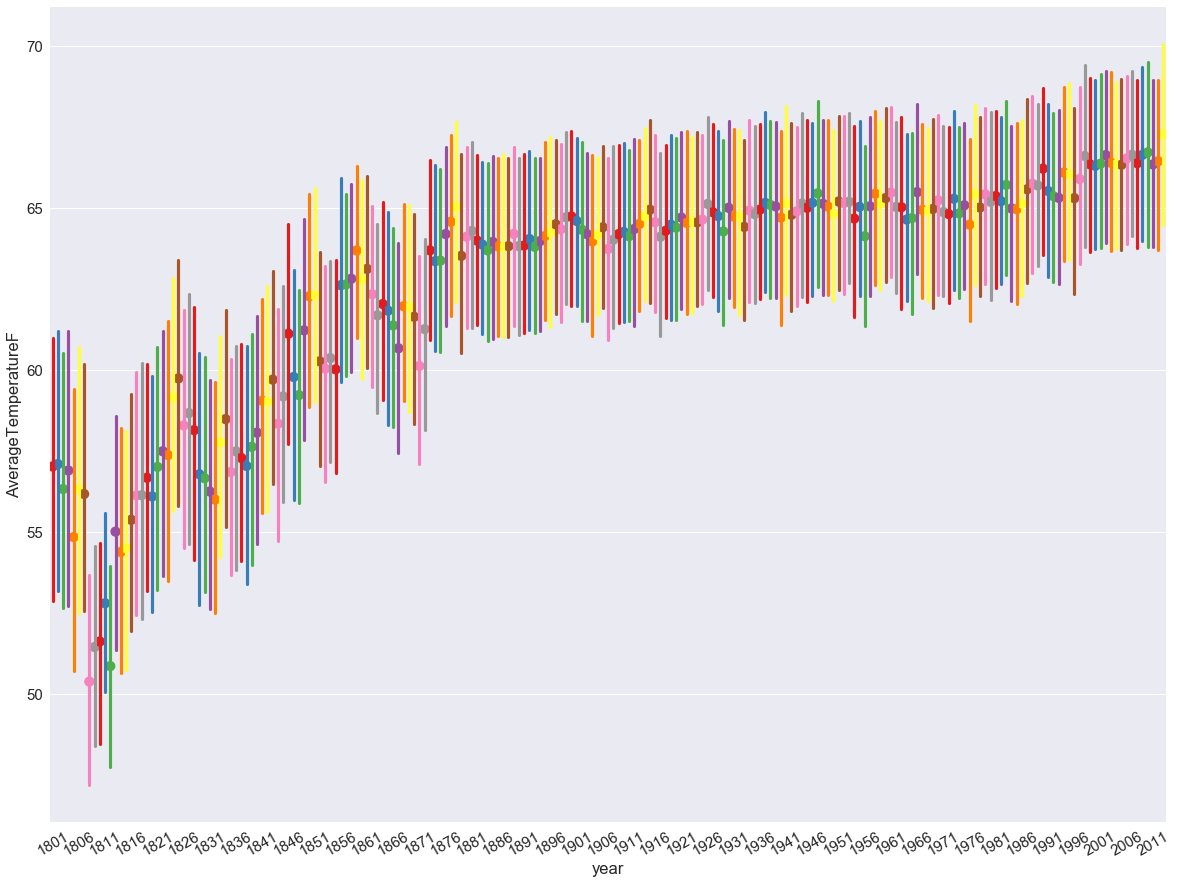

In [27]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1)
fig.set_size_inches((20, 15))

ax = sns.pointplot(x='year', y='AverageTemperatureF',palette="Set1",data=yearavg)

labels=ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%5 != 0): labels[i] = ''
ax.set_xticklabels(labels, rotation=30)

sns.set(font_scale=1.5)
plt.savefig('seabornalldata.png')

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

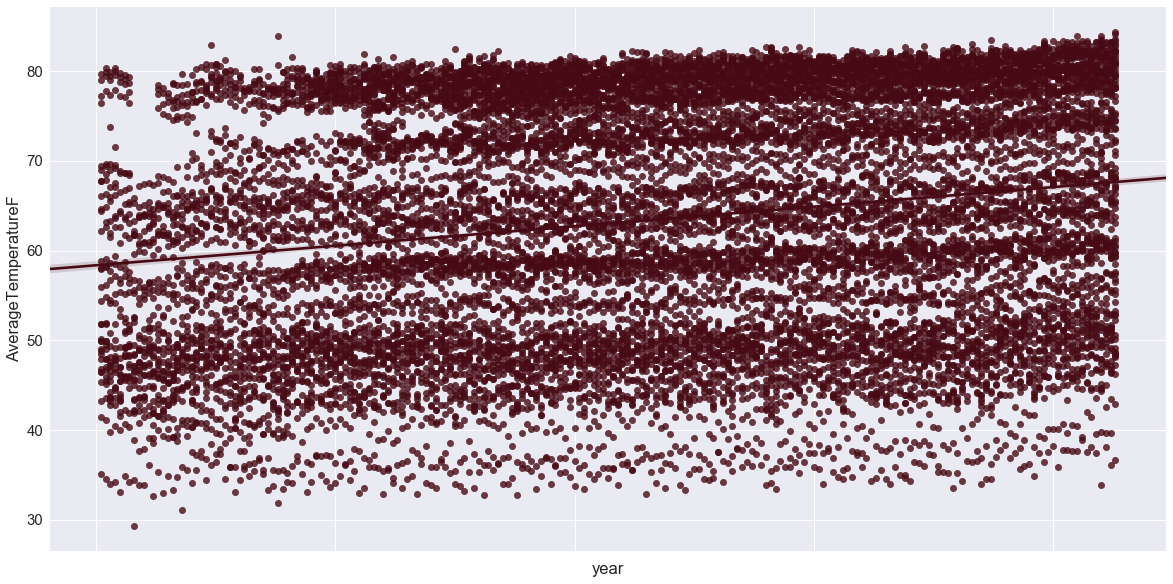

In [23]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1)
fig.set_size_inches((20, 10))

ax = sns.regplot(x='year', y='AverageTemperatureF',data=yearavg, color='#470A14')


labels=ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%5 != 0): labels[i] = ''
ax.set_xticklabels(labels, rotation=30)
